# K-Nearest Neighbors

**Split data into training and testing sets and scale data**

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, accuracy_score, \
                            recall_score, f1_score

df = pd.read_csv('preprocessed_data.csv')

# Split data
X = df.drop(columns=['h1n1_vaccine','seasonal_vaccine','respondent_id','Unnamed: 0'])
# Predicting on two values --> Two models
y_h1n1 = df['h1n1_vaccine']
y_seasonal = df['seasonal_vaccine']

# Training and testing sets (20% testing)
X_train, X_test, y_train_h1n1, y_test_h1n1 = train_test_split(X, y_h1n1, test_size= 0.2,random_state=123)
X_train, X_test, y_train_seasonal, y_test_seasonal = train_test_split(X, y_seasonal, test_size= 0.2,random_state=123)

# Scale data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Cross Validation**

In [33]:
# K values from 1 to 50
k_values = [i for i in range(1,50)]
best_pred_h1n1 = []

# H1N1 Prediction
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, weights = 'distance', p = 2)
    score = cross_val_score(knn, X, y_h1n1, cv=5)
    best_pred_h1n1.append(np.mean(score))

best_index = np.argmax(best_pred_h1n1)
best_k_h1n1 = k_values[best_index]

# Seasonal Prediction
best_pred_seasonal = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, weights = 'distance', p = 2)
    score = cross_val_score(knn, X, y_seasonal, cv=5)
    best_pred_seasonal.append(np.mean(score))
    
best_index = np.argmax(best_pred_seasonal)
best_k_seasonal = k_values[best_index]

**View K value Scores**

Text(0.5, 1.0, 'Cross Validation (H1N1)')

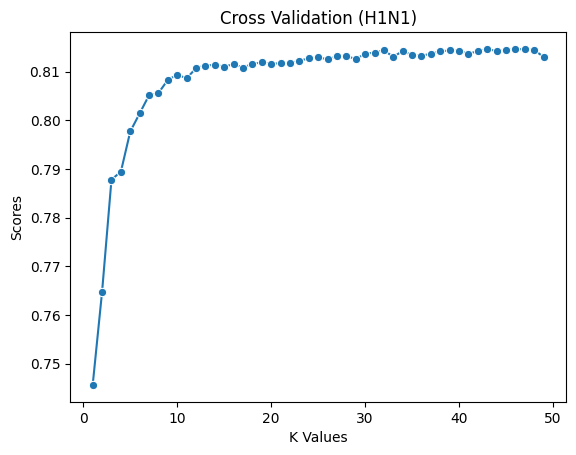

In [34]:
plt = sns.lineplot(x = k_values, y = best_pred_h1n1, marker = 'o')
plt.set(xlabel='K Values', ylabel = 'Scores')
plt.set_title('Cross Validation (H1N1)')

Text(0.5, 1.0, 'Cross Validation (Seasonal)')

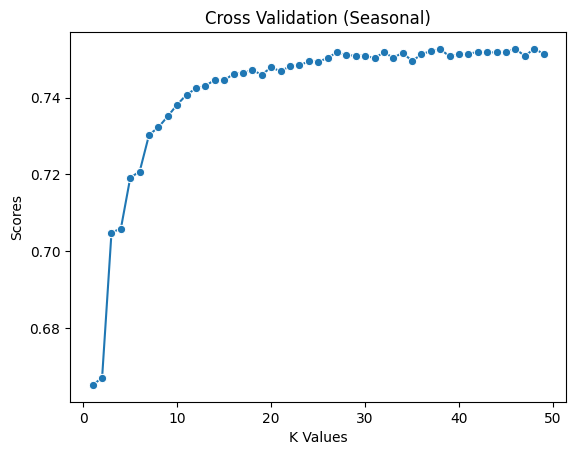

In [35]:
plt = sns.lineplot(x = k_values, y = best_pred_seasonal, marker = 'o')
plt.set(xlabel='K Values', ylabel = 'Scores')
plt.set_title('Cross Validation (Seasonal)')

In [36]:
# Train and fit model
# H1n1 prediction
knn=KNeighborsClassifier(n_neighbors=best_k_h1n1, weights='distance',p=2)
knn.fit(X_train, y_train_h1n1)
# Prediction
y_pred_h1n1 = knn.predict(X_test)
# Retrain model for seasonal vaccination prediction
knn=KNeighborsClassifier(n_neighbors=best_k_seasonal, weights='distance',p=2)
knn.fit(X_train, y_train_seasonal)
y_pred_seasonal = knn.predict(X_test)

**Model Evaluation**

In [37]:
# Metrics for H1N1 Prediction
accuracy = accuracy_score(y_test_h1n1, y_pred_h1n1)
precision = precision_score(y_test_h1n1, y_pred_h1n1)
recall = recall_score(y_test_h1n1, y_pred_h1n1)
f1 = f1_score(y_test_h1n1, y_pred_h1n1)
print("Prediction for H1N1 Vaccination Status\n")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Prediction for H1N1 Vaccination Status

Accuracy: 0.814488955447398
Precision: 0.6509433962264151
Recall: 0.2997393570807993
F1 Score: 0.41046995835812017


In [38]:
# Metrics for Seasonal Prediction
accuracy = accuracy_score(y_test_seasonal, y_pred_seasonal)
precision = precision_score(y_test_seasonal, y_pred_seasonal)
recall = recall_score(y_test_seasonal, y_pred_seasonal)
f1 = f1_score(y_test_seasonal, y_pred_seasonal)
print("Prediction for Seasonal Vaccination Status\n")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Prediction for Seasonal Vaccination Status

Accuracy: 0.7504679895170349
Precision: 0.7458843393837062
Recall: 0.7073658927141714
F1 Score: 0.7261146496815286


# Random Forest

In [54]:
from sklearn.ensemble import RandomForestClassifier

df = pd.read_csv('preprocessed_data.csv')

# Split data
X = df.drop(columns=['h1n1_vaccine','seasonal_vaccine','respondent_id','Unnamed: 0'])
# Predicting on two values --> Two models
y_h1n1 = df['h1n1_vaccine']
y_seasonal = df['seasonal_vaccine']

# Training and testing sets (20% testing)
# Random state ensures splits are the same for both predictions
X_train, X_test, y_train_h1n1, y_test_h1n1 = train_test_split(X, y_h1n1, test_size= 0.2,random_state=123)
X_train, X_test, y_train_seasonal, y_test_seasonal = train_test_split(X, y_seasonal, test_size= 0.2,random_state=123)

# Scale data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Cross Validation**

In [56]:
# K values from 50 to 200
k_values = [i for i in range(100,150)]
best_pred_h1n1 = []

# H1N1 Prediction
for k in k_values:
    rf = RandomForestClassifier(n_estimators=k)
    score = cross_val_score(rf, X, y_h1n1, cv=5)
    best_pred_h1n1.append(np.mean(score))

best_index = np.argmax(best_pred_h1n1)
best_k_h1n1 = k_values[best_index]

# Seasonal Prediction
best_pred_seasonal = []
for k in k_values:
    rf = RandomForestClassifier(n_estimators=k)
    score = cross_val_score(rf, X, y_seasonal, cv=5)
    best_pred_seasonal.append(np.mean(score))
    
best_index = np.argmax(best_pred_seasonal)
best_k_seasonal = k_values[best_index]

**View K value Scores**

Text(0.5, 1.0, 'Cross Validation (H1N1)')

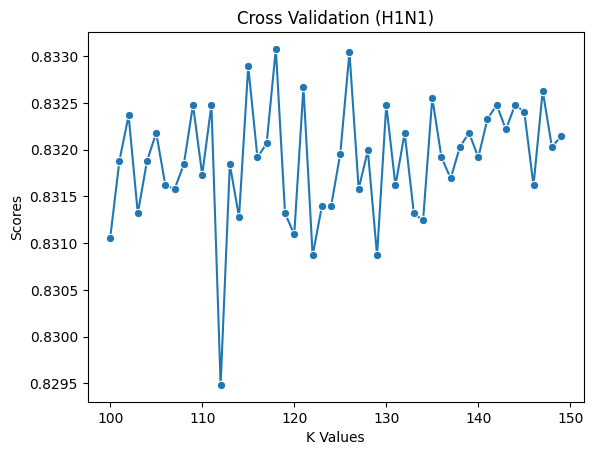

In [57]:
plt = sns.lineplot(x = k_values, y = best_pred_h1n1, marker = 'o')
plt.set(xlabel='K Values', ylabel = 'Scores')
plt.set_title('Cross Validation (H1N1)')

Text(0.5, 1.0, 'Cross Validation (Seasonal)')

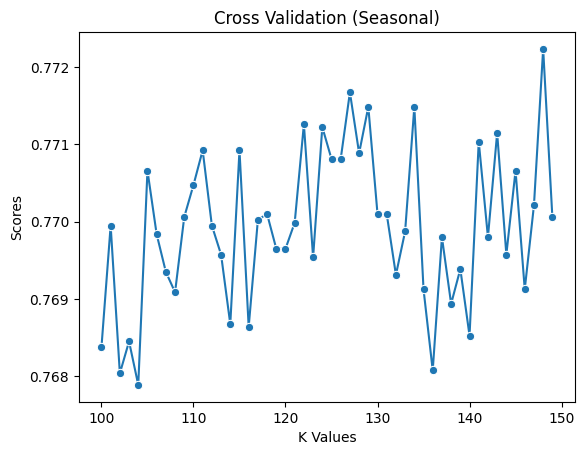

In [58]:
plt = sns.lineplot(x = k_values, y = best_pred_seasonal, marker = 'o')
plt.set(xlabel='K Values', ylabel = 'Scores')
plt.set_title('Cross Validation (Seasonal)')

**Train Model**

In [59]:
# Train and fit model
# H1n1 prediction
rf = RandomForestClassifier(n_estimators=best_k_h1n1)
rf.fit(X_train,y_train_h1n1)
y_pred_h1n1 = rf.predict(X_test)
h1n1_importances=rf.feature_importances_

# Seasonal prediction
rf = RandomForestClassifier(n_estimators=best_k_seasonal)
rf.fit(X_train,y_train_seasonal)
y_pred_seasonal = rf.predict(X_test)
seasonal_importances=rf.feature_importances_

**Model Evaluation**

In [60]:
# Metrics for H1N1 Prediction
accuracy = accuracy_score(y_test_h1n1, y_pred_h1n1)
precision = precision_score(y_test_h1n1, y_pred_h1n1)
recall = recall_score(y_test_h1n1, y_pred_h1n1)
f1 = f1_score(y_test_h1n1, y_pred_h1n1)
print("Prediction for H1N1 Vaccination Status\n")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Prediction for H1N1 Vaccination Status

Accuracy: 0.82983901160614
Precision: 0.6855828220858896
Recall: 0.38835794960903564
F1 Score: 0.49584026622296173


In [61]:
# Metrics for Seasonal Prediction
accuracy = accuracy_score(y_test_seasonal, y_pred_seasonal)
precision = precision_score(y_test_seasonal, y_pred_seasonal)
recall = recall_score(y_test_seasonal, y_pred_seasonal)
f1 = f1_score(y_test_seasonal, y_pred_seasonal)
print("Prediction for Seasonal Vaccination Status\n")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Prediction for Seasonal Vaccination Status

Accuracy: 0.7718083114938226
Precision: 0.7670146137787056
Recall: 0.7353883106485188
F1 Score: 0.750868587778459


**Extract Importances**

In [43]:

# Sort feature importances in descending order for h1n1 vaccines
sorted_indices = numpy.argsort(h1n1_importances)[::-1]
feature_names = X.columns  # This should already exclude 'respondent_id' and 'Unnamed: 0'

# Print feature importances
for idx in sorted_indices:
    print(f"{feature_names[idx]}: {h1n1_importances[idx]}")


doctor_recc_h1n1: 0.09149906879830123
opinion_h1n1_risk: 0.0746035650012633
hhs_geo_region: 0.0697372605170427
opinion_h1n1_vacc_effective: 0.06458756816188417
opinion_seas_risk: 0.0486857306102164
age_group: 0.04527565202438414
opinion_h1n1_sick_from_vacc: 0.03924390760330425
h1n1_concern: 0.03780779379972695
education: 0.037481773977614215
opinion_seas_sick_from_vacc: 0.03586105419201682
census_msa: 0.03439612983259932
opinion_seas_vacc_effective: 0.033664262499952864
household_adults: 0.0314215760169647
income_poverty: 0.02780144019515631
h1n1_knowledge: 0.026808084308413846
household_children: 0.02656380623683178
employment_status: 0.024672516530327843
race: 0.02208236678549617
doctor_recc_seasonal: 0.02182146674921846
sex: 0.02180339844407983
health_worker: 0.021418577978745475
marital_status: 0.018706190570657342
chronic_med_condition: 0.018423952198888968
behavioral_large_gatherings: 0.017955751548452456
behavioral_outside_home: 0.017733553811700123
behavioral_touch_face: 0.0170

In [44]:
# Sort feature importances in descending order for seasonal vaccines 
sorted_indices = numpy.argsort(seasonal_importances)[::-1]
feature_names = X.columns  # This should already exclude 'respondent_id' and 'Unnamed: 0'

# Print feature importances
for idx in sorted_indices:
    print(f"{feature_names[idx]}: {seasonal_importances[idx]}")


opinion_seas_vacc_effective: 0.09832440942341097
opinion_seas_risk: 0.09176229332829676
age_group: 0.0744415513183237
doctor_recc_seasonal: 0.06620546306481592
hhs_geo_region: 0.06323047625306268
opinion_h1n1_risk: 0.041043027769202683
opinion_h1n1_vacc_effective: 0.03917674481643005
opinion_seas_sick_from_vacc: 0.036521233119738775
education: 0.03571603725536593
h1n1_concern: 0.034866470971115164
opinion_h1n1_sick_from_vacc: 0.034806254022014024
census_msa: 0.03110943714145825
household_adults: 0.029149299311477646
h1n1_knowledge: 0.027869798546866834
income_poverty: 0.02606205580744282
household_children: 0.025020355190673912
employment_status: 0.022577376904895377
race: 0.02220435633183462
sex: 0.01917396502119624
chronic_med_condition: 0.01776501048907103
marital_status: 0.016887545233916855
doctor_recc_h1n1: 0.01665210813228444
behavioral_touch_face: 0.016544610333922835
behavioral_large_gatherings: 0.01634307599238587
behavioral_outside_home: 0.016160207894365446
behavioral_avoid

**Feature Dropping**

In [45]:
df = pd.read_csv('preprocessed_data.csv')

In [46]:

def modeling_Feature_Importance(X,y,model):
    # Split data
    X = df.drop(columns=['h1n1_vaccine','seasonal_vaccine','respondent_id','Unnamed: 0'])
    
   
    # Initialize a dictionary to store the accuracy for each feature removed
    accuracy_with_feature_removed = {}

    # Iterate over each feature to remove it and evaluate the model performance without it
    for column in X.columns:
        # Drop the current feature
        X_temp = X.drop(column, axis=1)

        # Split the modified dataset
        X_train_temp, X_test_temp, y_train_temp, y_test_temp = train_test_split(X_temp, y, test_size=0.2, random_state=42)

        # Scale the data
        scaler_temp = StandardScaler()
        X_train_temp_scaled = scaler_temp.fit_transform(X_train_temp)
        X_test_temp_scaled = scaler_temp.transform(X_test_temp)

        # Train and evaluate the KNN model without the current feature
        if (model== "knn"):
            model=KNeighborsClassifier(n_neighbors=5)
            
        else:
            model=RandomForestClassifier()
        model.fit(X_train_temp_scaled, y_train_temp)
        predictions_temp = model.predict(X_test_temp_scaled)
        accuracy_temp = accuracy_score(y_test_temp, predictions_temp)

        # Store the accuracy in the dictionary
        accuracy_with_feature_removed[column] = accuracy_temp

    # Convert the dictionary to a DataFrame for easier analysis and sort by accuracy
    return pd.DataFrame(list(accuracy_with_feature_removed.items()), columns=['Feature Removed', 'Accuracy']).sort_values(by='Accuracy', ascending=False)






In [47]:
#Note higher accuracy means less useful feature 

In [48]:
modeling_Feature_Importance(df,df['h1n1_vaccine'], "knn") #h1h1, knn

,Feature Removed,Accuracy
21,education,0.837327
6,behavioral_large_gatherings,0.837140
27,employment_status,0.836952
5,behavioral_wash_hands,0.836952
19,opinion_seas_sick_from_vacc,0.836578
26,rent_or_own,0.836578
16,opinion_h1n1_sick_from_vacc,0.836204
8,behavioral_touch_face,0.836204
25,marital_status,0.835829
30,household_adults,0.835642


In [49]:
modeling_Feature_Importance(df,df['seasonal_vaccine'], "knn") #seasonal, vaccine knn

,Feature Removed,Accuracy
7,behavioral_outside_home,0.780794
2,behavioral_antiviral_meds,0.778360
19,opinion_seas_sick_from_vacc,0.777799
31,household_children,0.777424
4,behavioral_face_mask,0.777424
11,chronic_med_condition,0.777424
15,opinion_h1n1_risk,0.776863
30,household_adults,0.776675
14,opinion_h1n1_vacc_effective,0.776488
23,sex,0.776488


In [50]:
modeling_Feature_Importance(df,df['h1n1_vaccine'], "random") #h1n1, random forest

,Feature Removed,Accuracy
8,behavioral_touch_face,0.839012
1,h1n1_knowledge,0.838076
10,doctor_recc_seasonal,0.838076
7,behavioral_outside_home,0.837701
23,sex,0.837701
2,behavioral_antiviral_meds,0.837514
31,household_children,0.837327
30,household_adults,0.837327
5,behavioral_wash_hands,0.837140
24,income_poverty,0.837140


In [51]:
modeling_Feature_Importance(df,df['seasonal_vaccine'], "random") #seasonal, random forest

,Feature Removed,Accuracy
5,behavioral_wash_hands,0.780794
14,opinion_h1n1_vacc_effective,0.780232
12,child_under_6_months,0.779296
15,opinion_h1n1_risk,0.778922
0,h1n1_concern,0.778547
7,behavioral_outside_home,0.778547
4,behavioral_face_mask,0.778360
22,race,0.778173
31,household_children,0.777799
26,rent_or_own,0.777424
